## Non-CO2 pollutants and comparing Greenhouse Gases

### IECDT November 2025
#### Stuart Jenkins

In [149]:
# the usual preambles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fair

# Check we're using v2.0.0-alpha
print(f"We're using FaIR version {fair.__version__}") 

# The "engine" of fair is run_fair, stored in the fair.fair_runner class
from fair import *

We're using FaIR version 2.0.0-alpha


### Other Contributors To Global Warming

Anthropogenic global warming is caused by more than just CO$_2$. 

There are important contributions from a range of greenhouse gases, including methane (CH4), nitrous oxide (N2O), Ozone (O3), various hydroflurocarbons (HFCs), chloroflorocarbons (CFCs) and hydro-chloroflurocarbons (HCFCs). 

There are also aerosol species which absorb and/or reflect incoming solar radiation, causing their own localised heating and cooling effects. They can also interact with clouds to cause changes in the structure and amount of clouds, impacting surfact radiation. 

Finally, there are a number of natural contributors, feedbacks, and other effects, which contribute to global surface temperature rise. These include effects like: contrail formation, stratospheric and tropospheric water vapour, albedo variations, solar variability, and volcanoes. 

![energy_balance](./materials/SRL-image-2.png)

Energy balance figure from Chapter 7, WG1 assessment of IPCC AR6. 

![ERF_static](./materials/SRL-image-6.png)

Effective Radiative Forcing of individual species (2019 relative to 1750). Taken from IPCC AR6 WG1 Ch7.

![temp_timeseries](./materials/SRL-image-8.png)

Resulting temperature response from individual species (2019 relative to 1750). Taken from IPCC AR6 WG1 Ch7.

### We have a problem for mitigation policy 

All of these various contributors to global warming don't just go away in the future, they each have their own lifetime and strength, and they may or may not be associated with CO2 emissions -- so even if we successfully halt CO2 induced warning, we need to have an understnading of how other pollutants impact on the climate system. 

#### Q: how can we compare different pollutants contributions to climate change?

Have a go: you have the tools you need in the previous workbook. 
- First you need to generate a set of gas parameters, and a set of thermal parameters. 
- !Remember for the gas parameters you can specify other species than carbon_dioxide!
- e.g. try 'methane' or 'nitrous oxide'.
- Now generate an emissions timeseries for each pollutant, perhaps starting with a simple pulse emission at year 0
- You could also try a constant emissions profile as well (e.g. 10 units of emissions from year 0 for 100 years).
- Now you have the parameter sets and the emissions timeseries, you can run this through FaIR.

- If you do the same for carbon_dioxide, methane and nitrous_oxide, what does the resulting atmospheric concentration, radaitive forcing, temperature response look like? 


In [38]:
co2_gas_params = get_gas_parameter_defaults(choose_gases=['carbon_dioxide'])
ch4_gas_params = get_gas_parameter_defaults(choose_gases=['methane'])
n2o_gas_params = get_gas_parameter_defaults(choose_gases=['nitrous_oxide'])

therm_params = get_thermal_parameter_defaults()


In [27]:
start_year = 0
end_year = 500
# Create empty emissions dataframe
ch4Ems_to_run = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['methane'])
n2oEms_to_run = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['nitrous_oxide'])
co2Ems_to_run = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['carbon_dioxide'])

ch4Ems_to_run.loc[100] = 1000 # 1 GtCH4
n2oEms_to_run.loc[100] = 1000 * 28/120 * 12/44 # 1 GtN2O adjusted to a quantity equivalent to the GWP100 value of methane
co2Ems_to_run.loc[100] = 28 * 12/44 # 28 GtCO2


/var/folders/kh/v0_23m1s0bsgm7tkgfnywj_00000gr/T/ipykernel_82150/3125224327.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '63.63636363636363' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  n2oEms_to_run.loc[100] = 1000 * 28/120 * 12/44 # 1 GtN2O adjusted to a quantity equivalent to the GWP100 value of methane
/var/folders/kh/v0_23m1s0bsgm7tkgfnywj_00000gr/T/ipykernel_82150/3125224327.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.636363636363637' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co2Ems_to_run.loc[100] = 28 * 12/44 # 28 GtCO2


In [28]:
out_ch4 = run_FaIR(emissions_in=ch4Ems_to_run, gas_parameters=ch4_gas_params, thermal_parameters=therm_params)
out_n2o = run_FaIR(emissions_in=n2oEms_to_run, gas_parameters=n2o_gas_params, thermal_parameters=therm_params)
out_co2 = run_FaIR(emissions_in=co2Ems_to_run, gas_parameters=co2_gas_params, thermal_parameters=therm_params)

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['methane'] forcing agents, between 0 and 500...


100%|████████████████████████████████| 500/500 [00:00<00:00, 8663.84 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['nitrous_oxide'] forcing agents, between 0 and 500...



100%|███████████████████████████████| 500/500 [00:00<00:00, 14973.13 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 0 and 500...



100%|███████████████████████████████| 500/500 [00:00<00:00, 16000.49 timestep/s]


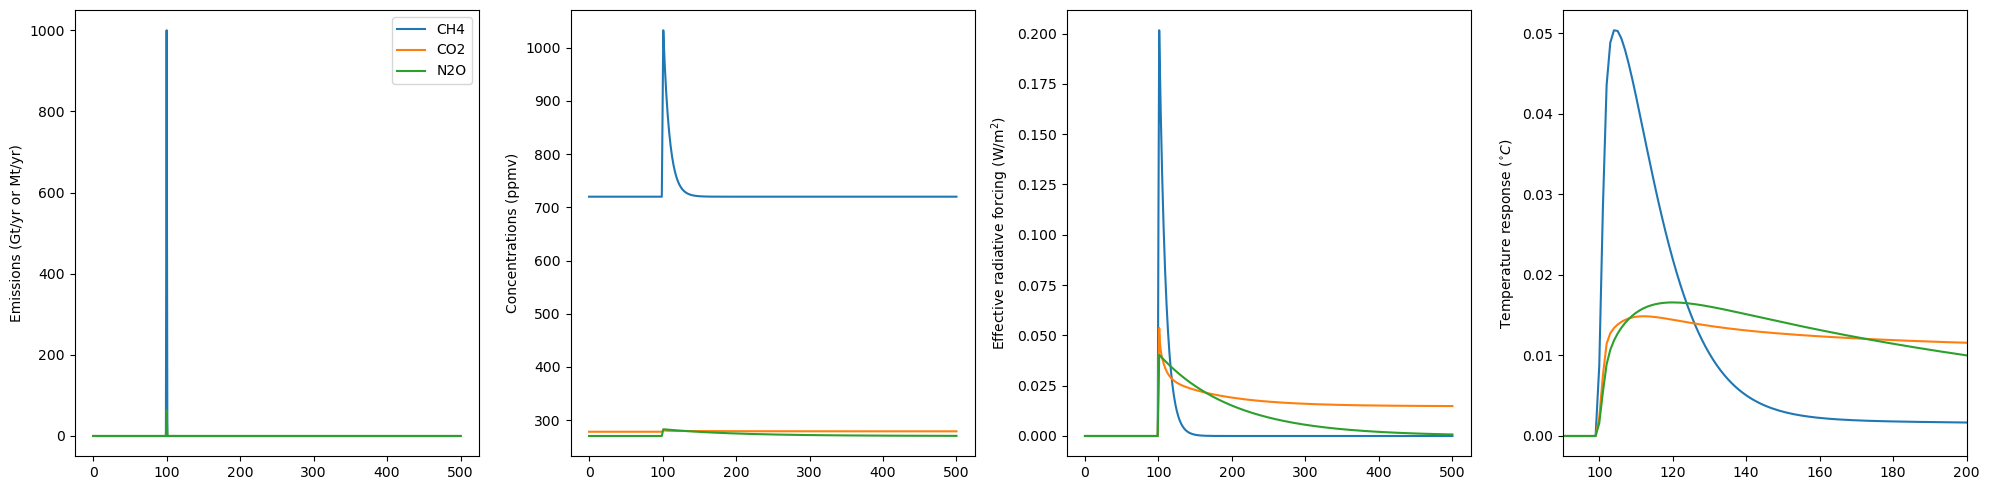

In [37]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(np.arange(0,501), out_ch4['Emissions'].values.squeeze(), label='CH4')
ax[0].plot(np.arange(0,501), out_co2['Emissions'].values.squeeze(), label='CO2')
ax[0].plot(np.arange(0,501), out_n2o['Emissions'].values.squeeze(), label='N2O')
ax[0].set_ylabel('Emissions (Gt/yr or Mt/yr)')

ax[1].plot(np.arange(0,501), out_ch4['C'].values.squeeze(), label='CH4')
ax[1].plot(np.arange(0,501), out_co2['C'].values.squeeze(), label='CO2')
ax[1].plot(np.arange(0,501), out_n2o['C'].values.squeeze(), label='N2O')
ax[1].set_ylabel('Concentrations (ppmv)')

ax[2].plot(np.arange(0,501), out_ch4['RF'][0]['default']['methane'], label='CH4')
ax[2].plot(np.arange(0,501), out_co2['RF'][0]['default']['carbon_dioxide'], label='CO2')
ax[2].plot(np.arange(0,501), out_n2o['RF'][0]['default']['nitrous_oxide'], label='N2O')
ax[2].set_ylabel('Effective radiative forcing (W/m$^2$)')

ax[3].plot(np.arange(0,501), out_ch4['T'].values.squeeze(), label='CH4')
ax[3].plot(np.arange(0,501), out_co2['T'].values.squeeze(), label='CO2')
ax[3].plot(np.arange(0,501), out_n2o['T'].values.squeeze(), label='N2O')
ax[3].set_ylabel('Temperature response ($^{\circ}C$)')
ax[0].legend(loc='best')
plt.xlim(90,200)

fig.tight_layout()

#### How much more potent is methane than CO2? Whats the trade off between a cow and a lump of coal? 

We can answer this by calculating a metric to convert between the two pollutants.

Greenhouse gas metrics are common tools for policymakers and businesses, but how are they calculated? 

These are used to compare the ''potency'' of different greenhouse gases,
taking into account both efficacy and life-time. They provide the currency of current
multi-gas trading systems such as the European Emission Trading System. If we assume a constant efficacy and simple expoential lifetime, the forcing resulting from a unit mass pulse injection is:
$$ F_{\rm pulse} = F_0 e^{-k_{\rm F} t} \quad . $$
"Absolute Global Warming Potential for a time-horizon $H$", or AGWP$_H$, is defined as the integrated radiative forcing over $H$ years following a unit mass pulse injection:
$$\mbox{AGWP}_H \equiv \int_{t=0}^{H} F_{\rm pulse} dt = 
\frac{F_0}{k_{\rm F}} (1 - e^{-k_{\rm F} H}) \,\, .$$
You can also think of this as the impact on radiative forcing after $H$ years of a sustained (continuous) unit-mass-per-year injection starting in year 0 (we've linearised the response, so we can reverse the order of integration).

For a gas that cannot be characterised by a single lifetime, we can generalised by assuming emissions are distributed over multiple pools each of which has it's own lifetime. 

From here we can calculate the GWP value, over time horizon H, for pollutants by comparing the AGWP of each pollutant against that of CO2:

GWP$_H$ = $\int_{t'=0}^{H}{\frac{AGWP_{GHG}(t')}{AGWP_{CO2}(t')}dt'}$

#### Q: Plot the radiative foricng in response to a 1 GtCO2 pulse emission of carbon dioxide against a 1 GtCH4 pulse emission of methane. From here, calculate the AGWP timeseries for each. 

- remember, FaIR emissions input units are MtCH4/yr, and GtC/yr

#### Q: Using the definition of GWP$_H$, calculate the GWP$_{20}$ and GWP$_{100}$ for methane and/or nitrous oxide.

#### Q: Make FaIR runs with a pulse emission of a unit emission of methane, and a 'GWP_H'-sized emission of CO2.  Plot the radiative forcing and temperature responses. What do you notice? 

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['methane'] forcing agents, between 0 and 500...


/var/folders/kh/v0_23m1s0bsgm7tkgfnywj_00000gr/T/ipykernel_82150/3071476910.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.590909090909091' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  co2_pulse_for_agwp.loc[0] = 12/44 * 20.5
100%|███████████████████████████████| 500/500 [00:00<00:00, 10250.06 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['methane'] forcing agents, between 0 and 500...



100%|███████████████████████████████| 500/500 [00:00<00:00, 15117.22 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 0 and 500...



100%|███████████████████████████████| 500/500 [00:00<00:00, 15311.70 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 0 and 500...



100%|███████████████████████████████| 500/500 [00:00<00:00, 15492.46 timestep/s]


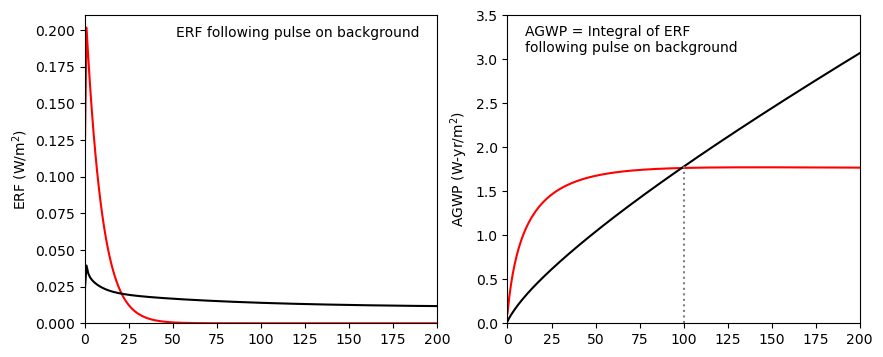

In [112]:
# example calculation for methane

# build pulse and sustained emissions timeseries for CH4 calc
ch4_pulse_for_agwp = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['methane'])
ch4_sustained_for_agwp = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['methane'])
ch4_pulse_for_agwp.loc[0] = 1000
ch4_sustained_for_agwp.loc[:] = 1000

# build pulse and sustained emissions timeseries for CO2 calc (* 20.5 -- my by-eye estimated GWP100 value)
co2_pulse_for_agwp = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['carbon_dioxide'])
co2_sustained_for_agwp = return_empty_emissions(start_year=start_year, end_year=end_year, gases_in=['carbon_dioxide'])
co2_pulse_for_agwp.loc[0] = 12/44 * 20.5
co2_sustained_for_agwp.loc[:] = 12/44 * 20.5

# run them through FaIR
out_ch4pulse_agwp = run_FaIR(emissions_in=ch4_pulse_for_agwp, gas_parameters=ch4_gas_params, thermal_parameters=therm_params)
out_ch4sustained_agwp = run_FaIR(emissions_in=ch4_sustained_for_agwp, gas_parameters=ch4_gas_params, thermal_parameters=therm_params)
out_co2pulse_agwp = run_FaIR(emissions_in=co2_pulse_for_agwp, gas_parameters=co2_gas_params, thermal_parameters=therm_params)
out_co2sustained_agwp = run_FaIR(emissions_in=co2_sustained_for_agwp, gas_parameters=co2_gas_params, thermal_parameters=therm_params)

# make figure showing that the chosen GWP100 value is approximately correct
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(np.arange(0,501), out_ch4pulse_agwp['RF'][0]['default']['Total'], color='red')
ax[0].plot(np.arange(0,501), out_co2pulse_agwp['RF'][0]['default']['Total'], color='black')
ax[0].set_xlim(0,200)
ax[1].plot(np.arange(0,501), out_ch4sustained_agwp['RF'][0]['default']['Total'], color='red')
ax[1].plot(np.arange(0,501), out_co2sustained_agwp['RF'][0]['default']['Total'], color='black')
ax[1].set_xlim(0,200)
ax[0].set_ylim(0,0.21)
ax[1].set_ylim(0,3.5)
ax[0].text(0.95,0.93, 'ERF following pulse on background', transform=ax[0].transAxes, ha='right')
ax[1].text(0.05,0.88, 'AGWP = Integral of ERF \nfollowing pulse on background', transform=ax[1].transAxes, ha='left')
ax[0].set_ylabel('ERF (W/m$^2$)')
ax[1].set_ylabel('AGWP (W-yr/m$^2$)')
ax[1].plot([100,100], [0,1.8], color='grey', linestyle=':')


### Note that the estimated GWP100 values for methane come out a little lower than you may expect. Why is this?

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1850 and 2250...


/var/folders/kh/v0_23m1s0bsgm7tkgfnywj_00000gr/T/ipykernel_82150/3180511815.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.74  0.74  0.76  0.76  0.77  0.78  0.79  0.8   0.8   0.81  0.79  0.79
  0.78  0.78  0.79  0.8   0.8   0.8   0.81  0.81  0.89  0.93  0.96  0.99
  1.    1.03  1.04  1.05  1.07  1.09  1.12  1.13  1.16  1.18  1.2   1.21
  1.21  1.24  1.27  1.28  1.34  1.38  1.39  1.4   1.42  1.46  1.48  1.51
  1.55  1.59  1.65  1.7   1.74  1.8   1.82  1.87  1.93  2.01  1.98  2.03
  2.03  2.05  2.08  2.13  2.02  2.    2.05  2.11  2.09  1.96  2.13  2.03
  2.1   2.23  2.23  2.26  2.26  2.35  2.36  2.44  2.4   2.33  2.26  2.33
  2.43  2.51  2.63  2.72  2.65  2.71  2.84  2.9   2.9   2.94  2.92  2.69
  2.76  2.9   2.97  2.89  3.18  3.37  3.42  3.48  3.54  3.74  3.91  4.03
  4.12  4.23  4.2   4.13  4.18  4.27  4.35  4.44  4.54  4.63  4.8   5.04
  5.32  5.46  5.63  5.83  5.78  5.76  5.98  6.1   6.25  6.36  6.37  6.

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1850 and 2250...



/var/folders/kh/v0_23m1s0bsgm7tkgfnywj_00000gr/T/ipykernel_82150/3180511815.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.74  0.74  0.76  0.76  0.77  0.78  0.79  0.8   0.8   0.81  0.79  0.79
  0.78  0.78  0.79  0.8   0.8   0.8   0.81  0.81  0.89  0.93  0.96  0.99
  1.    1.03  1.04  1.05  1.07  1.09  1.12  1.13  1.16  1.18  1.2   1.21
  1.21  1.24  1.27  1.28  1.34  1.38  1.39  1.4   1.42  1.46  1.48  1.51
  1.55  1.59  1.65  1.7   1.74  1.8   1.82  1.87  1.93  2.01  1.98  2.03
  2.03  2.05  2.08  2.13  2.02  2.    2.05  2.11  2.09  1.96  2.13  2.03
  2.1   2.23  2.23  2.26  2.26  2.35  2.36  2.44  2.4   2.33  2.26  2.33
  2.43  2.51  2.63  2.72  2.65  2.71  2.84  2.9   2.9   2.94  2.92  2.69
  2.76  2.9   2.97  2.89  3.18  3.37  3.42  3.48  3.54  3.74  3.91  4.03
  4.12  4.23  4.2   4.13  4.18  4.27  4.35  4.44  4.54  4.63  4.8   5.04
  5.32  5.46  5.63  5.83  5.78  5.76  5.98  6.1   6.25  6.36  6.37  

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['methane'] forcing agents, between 1850 and 2250...



100%|███████████████████████████████| 400/400 [00:00<00:00, 15601.20 timestep/s]

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1850 and 2250...



100%|███████████████████████████████| 400/400 [00:00<00:00, 15397.17 timestep/s]


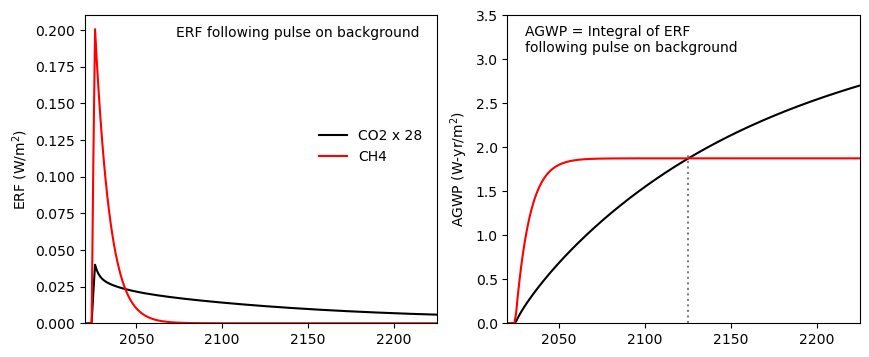

In [120]:
# we can get more sophisticated by working relative to a realistic background state

# first loading historial CO2 emissions between 1850 and 2018
GCB = pd.read_csv('../data/Global_Carbon_Budget_2019v1.0.csv')
historical_co2_ems = GCB['fossil fuel and industry'].loc[1850-1750:2018-1750] + GCB['land-use change emissions'].loc[1850-1750:2018-1750]
co2_hist = return_empty_emissions(start_year=1850, end_year=2250, gases_in=['carbon_dioxide'])
co2_hist.loc[:2018,(0,'carbon_dioxide')] = historical_co2_ems.values
co2_hist.loc[2019:,(0,'carbon_dioxide')] = historical_co2_ems.values[-1] + np.arange(1,2252-2019)/3

# next adding AR6 non-CO2 radiative forcing between 1850-2018
ar6_erf = pd.read_csv('../data/AR6_ERF_1750-2019.csv', index_col='year')
nonco2_erf = ar6_erf['total_anthropogenic'].loc[1850:2018].values - ar6_erf['co2'].loc[1850:2018].values
nonco2_hist = return_empty_forcing(start_year=1850, end_year=2250)
nonco2_hist.loc[:2018,(0,'forcing')] = nonco2_erf
nonco2_hist.loc[2019:,(0,'forcing')] = nonco2_erf[-1]

out_baseline = run_FaIR(emissions_in=co2_hist, forcing_in=nonco2_hist, gas_parameters=co2_gas_params, thermal_parameters=therm_params)

# prepare perturnation on background state for AGWP_CO2 calculation
co2_hist_plus_pulse = return_empty_emissions(start_year=1850, end_year=2250, gases_in=['carbon_dioxide'])
co2_hist_plus_pulse.loc[:2018,(0,'carbon_dioxide')] = historical_co2_ems.values
co2_hist_plus_pulse.loc[2019:,(0,'carbon_dioxide')] = historical_co2_ems.values[-1] + np.arange(1,2252-2019)/3
co2_hist_plus_pulse.loc[2025, (0,'carbon_dioxide')] += 12/44 * 28

# prepare total ERF forcing timeseries to perturb with AGWP_CH4 calculation
ant_erf = ar6_erf['total_anthropogenic'].loc[1850:2018].values
ant_hist = return_empty_forcing(start_year=1850, end_year=2250)
ant_hist.loc[:, (0,'forcing')] = out_baseline['RF'][0]['default']['Total']

# prepare CH4 emissions timeseries (perturbation in 2025)
ch4_pulse_em = return_empty_emissions(start_year=1850, end_year=2250, gases_in=['methane'])
ch4_pulse_em.loc[2025] = 1000

# run baseline and two pulse experiments
agwp_co2_pulse_baseline = run_FaIR(emissions_in=co2_hist_plus_pulse, forcing_in=nonco2_hist, gas_parameters=co2_gas_params, thermal_parameters=therm_params)
agwp_ch4_pulse_baseline = run_FaIR(emissions_in=ch4_pulse_em, forcing_in=ant_hist, gas_parameters=ch4_gas_params, thermal_parameters=therm_params)
agwp_baseline = run_FaIR(emissions_in=return_empty_emissions(start_year=1850, end_year=2250, gases_in=['carbon_dioxide']), forcing_in=ant_hist, gas_parameters=co2_gas_params, thermal_parameters=therm_params)

# difference them
agwp_co2_pulse = agwp_co2_pulse_baseline['RF'][0]['default']['Total'] - out_baseline['RF'][0]['default']['Total']
agwp_ch4_pulse = agwp_ch4_pulse_baseline['RF'][0]['default']['Total'] - agwp_baseline['RF'][0]['default']['Total']

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(np.arange(1850,2251), agwp_co2_pulse, color='black', label='CO2 x 28')
ax[0].plot(np.arange(1850,2251), agwp_ch4_pulse, color='red', label='CH4')
ax[1].plot(np.arange(1850,2251), np.cumsum(agwp_co2_pulse), color='black', label='CO2 x 28')
ax[1].plot(np.arange(1850,2251), np.cumsum(agwp_ch4_pulse), color='red', label='CH4')

ax[0].legend(loc=(0.65,0.5), edgecolor='none', framealpha=0.0)

ax[0].set_xlim(2020,2225)
ax[1].set_xlim(2020,2225)

ax[0].set_ylim(0,0.21)
ax[1].set_ylim(0,3.5)

ax[0].text(0.95,0.93, 'ERF following pulse on background', transform=ax[0].transAxes, ha='right')
ax[1].text(0.05,0.88, 'AGWP = Integral of ERF \nfollowing pulse on background', transform=ax[1].transAxes, ha='left')

ax[0].set_ylabel('ERF (W/m$^2$)')
ax[1].set_ylabel('AGWP (W-yr/m$^2$)')

ax[1].plot([2125,2125], [0,1.95], color='grey', linestyle=':')


Using a real baseline scenario makes things better. Now, as expected, we find the GWP100 of methane to be approxiamtely 28. Just as the found in recent IPCC Assessment Reports! 


### What about the warming response? 

Lets take the simple case where the perturbations are applied on a pre-inudstrial baseline.

We can also investigate the global temperature potential:

#### Q: What is the ratio of the warming response to a pulse emission of methane, to a pulse emission of CO2?

Text(0.5, 0, 'Years since pulse emission')

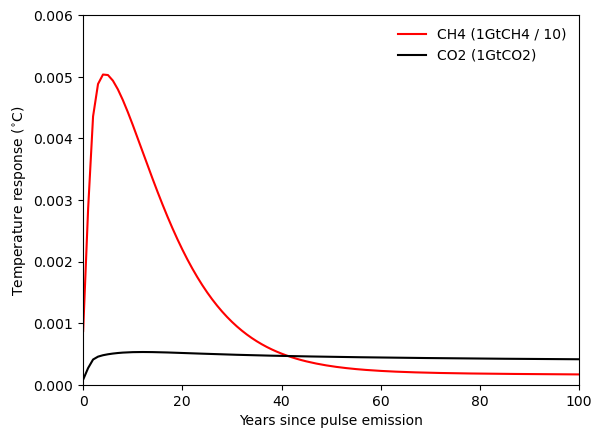

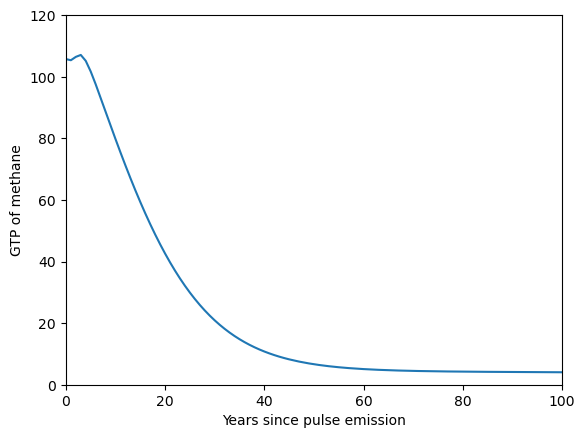

In [148]:
# we already ran these experiments. Now we can just take them and plot 
#(remembering that the CO2 values i ran were for 20.5GtCO2 not 1GtCO2, 
#but can roughly assume linearity and divide that out...:
ch4_temp = out_ch4pulse_agwp['T'].values.squeeze()
co2_temp = out_co2pulse_agwp['T'].values.squeeze() / 20.5

plt.plot(np.arange(0,501), ch4_temp / 10, color='red', label='CH4 (1GtCH4 / 10)')
plt.plot(np.arange(0,501), co2_temp, color='black', label='CO2 (1GtCO2)')
plt.legend(loc='upper right', edgecolor='none', framealpha=0.0)
plt.xlim(0,100)
plt.ylim(0,0.006)
plt.ylabel('Temperature response ($^{\circ}$C)')
plt.xlabel('Years since pulse emission')

plt.figure()
plt.plot(np.arange(0,501), ch4_temp / co2_temp)
plt.xlim(0,100)
plt.ylim(0,120)
plt.ylabel('GTP of methane')
plt.xlabel('Years since pulse emission')

#### Q: Which one is right?

The problem we have here is that CO2 and CH4 behave in fundemantally different ways in the atmosphere. We are comparing apples to oranges.



### An alternative (better?) way: GWP*

This is a revised way of using GWPs to relate short-lived and cumulative climate pollutants, reflecting the fact that radiative forcing due to a short-lived climate pollutant (SLCP) is approximately equal to the rate of emission multiplied by the $H$-year GWP times the AGWP of CO$_2$, assuming this rate changes slower than the atmospheric lifetime of the SLCP:
$$ F_{\rm SLCP} = E_{\rm SLCP} \times \mbox{GWP}_H \times \mbox{AGWP}_H(\mbox{CO}_2) $$

We can also approximate the forcing due to CO$_2$ emissions over interdecadal timescales with a single multi-century timescale, $\rho^{-1}=300$ years:
$$ \alpha E_{CO2} = \frac{d F_{CO2}}{dt} + \rho F $$
You should be able to convince yourself that $\alpha = \mbox{AGWP}_H(\mbox{CO}_2) / (\gamma H)$ where $\gamma = (1 - \exp(\rho H))/(\rho H)$ and hence
$$ E^* = \mbox{GWP}_H \gamma H \left(\frac{d E_{\rm SLCP}}{d t} + \rho E_{\rm SLCP} \right) $$
where $E^*$ is the CO$_2$ emissions (in tCO$_2$ per year) that give the same time-evolution of radiative forcing as $E_{\rm SLCP}$ (in tonnes of gas per year) of a SLCP such as methane. 

Since we are focussing on multi-decadal timescales, we can replace the derivative with a 20-year difference, so CO$_2$ warming-equivalent emissions of methane are given by $E^*(t)=128 \times E_{\rm CH4}(t) - 120 \times E_{\rm CH4}(t-20)$.

This captures the fact that a gently (-0.3\%/year) declining emissions of any gas with a lifetime $\ll 100$ years has the same impact on global temperature as a zero rate of emission of CO$_2$, while any permanent increase in SLCP emissions has the same impact as a very large one-off pulse emission of CO$_2$, since both would cause a step increase in global temperatures. An interesting consequence of this is that reductions in SLCP emissions faster than 0.3\% per year are actually equivalent to negative CO$_2$ emissions as far as impact on global temperatures is concerned. 

### For methane, it is not too complicated:

We can approxiamte CO2-warming-equivalent emissions with the following equation:

$E^*(t)=128 \times E_{\rm CH4}(t) - 120 \times E_{\rm CH4}(t-20)$.

#### Have a go!

Use the equation for E$^*$ above to generate a warming-equivalent CO2 emissions timeseries (perhaps rising linearly, then stabilising, then declining to zero again?), from which you can compute the warming response and compare against the true CH4 warming response using the CH4 emissions directly. 

Compare this with using a GWP100 value for the same conversion to CO2-equivalent emissions, and using a GTP value?

How do they stack up to one another, and to the expected 'true' response? 